In [1]:
#libraries
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
from numpy import random
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
from ipywidgets import interactive
import ipywidgets as widgets
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import boxcox
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Function for reading the data:
def read_customer_data():
    return pd.read_csv("customer_analysis_clean.csv")

In [3]:
df = read_customer_data()

In [4]:
list(df)

['Unnamed: 0',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type',
 'month_effective_to_date']

In [5]:
#Function for standardizing column names:
def standardize(df):
    new_columns = df.columns.str.lower().str.replace(" ", "_")
    df.columns = new_columns
    return df

In [6]:
#Function for dropping customer and unnamed:_0 columns
def drop_2cols(df):
    df.drop(columns=["unnamed:_0"], inplace=True)
    return df

In [7]:
#Drop duplicates and reset index
def dd(df):
    df = df.drop_duplicates().reset_index()
    df.drop(columns=["index"], inplace=True)
    return df

In [8]:
#Replacing null values
def fill_null(df):
    df["number_of_open_complaints"] = df["number_of_open_complaints"].fillna(value=0)
    df["vehicle_type"] = df["vehicle_type"].fillna(value="M")
    mean_months = round(df["months_since_last_claim"].mean())
    df["months_since_last_claim"] = df["months_since_last_claim"].fillna(value=mean_months)
    mean_income = round(df["income"].mean())
    df["income"] = df["income"].fillna(value=mean_income)
    return df

In [9]:
#Creating a months column for the effective_to_date column only
def month_creation(df):
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df["month_effective_to_date"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"]))
    return(df)

### Running the rest of the Pipeline

In [10]:
df = standardize(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10776 non-null  int64  
 1   state                          10163 non-null  object 
 2   customer_lifetime_value        10776 non-null  float64
 3   response                       10163 non-null  object 
 4   coverage                       10776 non-null  object 
 5   education                      10776 non-null  object 
 6   effective_to_date              10776 non-null  object 
 7   employmentstatus               10776 non-null  object 
 8   gender                         10776 non-null  object 
 9   income                         10776 non-null  int64  
 10  location_code                  10776 non-null  object 
 11  marital_status                 10776 non-null  object 
 12  monthly_premium_auto           10776 non-null 

In [11]:
df = month_creation(df)

In [12]:
df= drop_2cols(df)

In [13]:
df = dd(df)

In [14]:
df = fill_null(df)

In [15]:
df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month_effective_to_date
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,February
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,January
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10759,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10760,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10761,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,February
10762,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10764 entries, 0 to 10763
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          10151 non-null  object        
 1   customer_lifetime_value        10764 non-null  float64       
 2   response                       10151 non-null  object        
 3   coverage                       10764 non-null  object        
 4   education                      10764 non-null  object        
 5   effective_to_date              10764 non-null  datetime64[ns]
 6   employmentstatus               10764 non-null  object        
 7   gender                         10764 non-null  object        
 8   income                         10764 non-null  int64         
 9   location_code                  10764 non-null  object        
 10  marital_status                 10764 non-null  object        
 11  monthly_premium

In [17]:
# Identify all the cathegorical columns 
[col for col in df.columns if not col in df._get_numeric_data().columns]

['state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type',
 'month_effective_to_date']

In [18]:
# save a new subset -> numerical columns as the new DF
numerical = df._get_numeric_data()
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,15.0,31,0.0,7,707.925645
...,...,...,...,...,...,...,...,...
10759,15563.369440,0,253,15.0,40,0.0,7,1214.400000
10760,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10761,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10762,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [19]:
# save a new subset -> cathegorical columns as the new DF
categorical=[i for i in df.columns if df.dtypes[i]=='object']
categorical

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type',
 'month_effective_to_date']

In [20]:
# split between the independent variables and the target variable
X=numerical.drop('total_claim_amount', axis=1)
y=numerical.total_claim_amount


In [21]:
# scaling the data and splitting it into train and test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test , columns = X.columns)

In [22]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4.231428,0.528351,0.623619,-0.012525,0.433423,-0.403577,-0.410559
1,-0.147072,-0.324824,-0.037367,0.498656,-0.103833,0.712221,2.499275
2,-0.058898,-0.118011,-0.842046,1.009837,0.039435,-0.403577,-0.410559
3,0.430592,0.596774,5.250522,-0.012525,1.543752,-0.403577,-0.826250
4,-0.751970,0.820552,-0.698353,-0.012525,1.507935,-0.403577,-0.826250
...,...,...,...,...,...,...,...
7529,-0.723858,-1.230702,-0.296014,1.112073,1.472118,-0.403577,-0.826250
7530,0.341994,1.194304,1.025958,-1.341596,-0.605272,-0.403577,1.667894
7531,-0.205826,-0.168254,-0.296014,0.191947,1.257215,-0.403577,1.252203
7532,0.716639,1.298170,0.364972,0.805365,1.507935,-0.403577,-0.410559


In [23]:
X_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.461939,-0.553131,-0.870784,0.191947,-1.357431,-0.403577,1.667894
1,1.198403,1.512432,0.278757,1.214310,0.612508,-0.403577,-0.410559
2,-0.106920,-1.230702,0.077587,1.623255,0.576691,0.712221,0.005131
3,-0.131955,1.870759,-0.152321,1.214310,0.218520,-0.403577,0.005131
4,-0.036345,-1.230702,0.221280,-0.421470,-0.497821,-0.403577,0.005131
...,...,...,...,...,...,...,...
3225,-0.362575,0.023233,-0.698353,1.009837,-0.247102,-0.403577,0.005131
3226,0.382992,-1.230702,-0.928261,2.032200,0.827410,-0.403577,-0.410559
3227,1.817403,-1.230702,2.692793,0.703129,1.758654,0.712221,-0.410559
3228,-0.123871,-0.834864,-0.870784,-1.239360,-0.211285,-0.403577,-0.410559


### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train
y_pred=model.predict(X_test.to_numpy())   # test model y-predictor
y_pred_train=model.predict(X_train.to_numpy()) # train y-predictor
model_score = model.score(X_test,y_test)

In [25]:
# how is the trendline in the multidimension space?
print("Model-Intercept: ", model.intercept_)

print("Model-Coefficient: ", model.coef_)


Model-Intercept:  436.9393278229359
Model-Coefficient:  [  -5.17078703 -102.56897064  192.52567943   -0.77010473   -3.30667954
    0.68572093    0.4528061 ]


In [ ]:
## R-Squared -> SEE BELOW
from sklearn.metrics import mean_squared_error, r2_score

print("The R2 is {:.2f}".format(r2_score(y,y_pred)))

In [26]:
model.score(X_test,y_test) # Intermezzo -> checking for the robustness of the model

0.4853756982722013

Text(0.5, 1.0, 'Train Residual histogram')

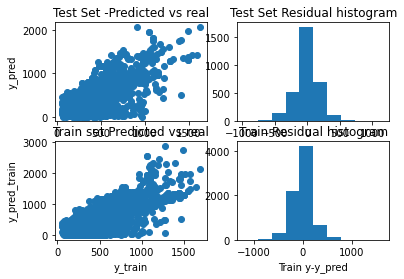

In [29]:
# first plot on the top left shows the y-predictor compared to the real y data in the test set
# we see a clear diagonal relationship which is a clear sign of a robust model

fig, ax = plt.subplots(2,2)
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# second plot on the top right show the error values/residuals from the above comparision distributed
# remember that the residuals have to be normally distributed as assumption Nr. 4 for OLS
# Homoscedasticity -> i.c. TRUE

ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

# Third plot on the bottom left shows the trained y-predictor compared to the real y data in the train set

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")



# Last plot on the bottom right show the error values/residuals from the above comparision distributed
# remember that the residuals have to be normally distributed as assumption Nr. 4 for OLS
# Homoscedasticity -> i.c. TRUE

ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")


In [27]:
r2= model.score(X_test.to_numpy(), y_test)
r2

0.4853756982722013

adjusted R2

In [28]:
N=X_train.shape[0]
p=1
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.4853073732188652


### Feature Importance¶

Here we see which of the features contribute most to the value to predicting the target value. The higher its coeffient (in absolute terms) the more it does.

In [30]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [31]:
features_importances

,Attribute,Importance
2,monthly_premium_auto,192.525679
5,number_of_open_complaints,0.685721
6,number_of_policies,0.452806
3,months_since_last_claim,-0.770105
4,months_since_policy_inception,-3.306680
0,customer_lifetime_value,-5.170787
1,income,-102.568971


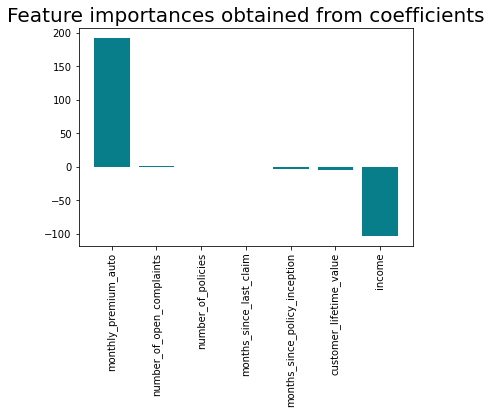

In [32]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Lasso

In [34]:
# Create an instance of Lasso Regression implementation (alpha is the penalty)
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)

In [35]:
# Fit the Lasso model
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [36]:
# Create the model score
lasso_yhat = lasso.predict(X_test)

In [37]:
### Intercept and coefficients
print('Intercept: \n', lasso.intercept_)
print('Coefficients: \n', lasso.coef_)

Intercept: 
 436.9393278229359
Coefficients: 
 [  -5.15413183 -102.55924539  192.50794478   -0.75928819   -3.29605886
    0.67583822    0.44206716]


In [38]:
### R2 R-squared
print ('train R2:   {} | test R2: {}'.format(lasso.score(X_train.to_numpy(), y_train),
                                            lasso.score(X_test.to_numpy(), y_test)))
print('-------------------------------------------------------------------------------')

train R2:   0.5316249731838631 | test R2: 0.48538507563694056
-------------------------------------------------------------------------------


### Ridge

Model Evaluation

In [52]:
def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
    ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))

    MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))
    MAE_test  = mean_absolute_error(np.exp(y_test),np.exp(y_pred_test))

    MSE_train = mean_squared_error(np.exp(y_train),np.exp(y_pred_train))
    MSE_test  = mean_squared_error(np.exp(y_test),np.exp(y_pred_test))

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(np.exp(y_train)-np.exp(y_pred_train)) / np.exp(y_train))* 100.)
    MAPE_test  = np.mean((np.abs(np.exp(y_test)-np.exp(y_pred_test)) / np.exp(y_test))* 100.)

    R2_train = r2_score(np.exp(y_train),np.exp(y_pred_train))
    R2_test  = r2_score(np.exp(y_test),np.exp(y_pred_test))

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': np.exp(y_train), 'Predicted': np.exp(y_pred_train)})
    df_test  = pd.DataFrame({'Real': np.exp(y_test),  'Predicted': np.exp(y_pred_test)})

    return performance, df_train, df_test

### KNN (k nearest Neighbor)

In [53]:
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

trans = PowerTransformer()
model = LinearRegression()

# define X and y (features and target)
#X = data.drop(columns = ['Id','SalePrice'])
#y = np.log(data['SalePrice']) # The model will try to predict the log(SalePrice) instead of the real price

# data splitting
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# transforming data
trans.fit(X_train)

X_train = trans.transform(X_train)
X_test  = trans.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test,  columns = X.columns)

# model
model.fit(X_train, y_train)

y_pred_train_lm = model.predict(X_train)
y_pred_test_lm  = model.predict(X_test)

Evaluating the model performance¶


In [54]:
performance_lm, _, _ = model_performance(y_train, y_pred_train_lm, y_test, y_pred_test_lm)
performance_lm

C:\Users\Fredo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-52-9e49accfa065>:3: RuntimeWarning: overflow encountered in exp
  ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
<ipython-input-52-9e49accfa065>:4: RuntimeWarning: overflow encountered in exp
  ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))
<ipython-input-52-9e49accfa065>:6: RuntimeWarning: overflow encountered in exp
  MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').